<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab08_DerivacionEIntegracion_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#1.Parte 1
1. En un cirtcuito con un voltaje de  $\varepsilon(t)$ y una inductancia de L, la primera ley de kirshhoff nos da la siguiente relación 


\begin{equation}
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
\end{equation}

donde r, es la resistencia del ciruito, i es la corriente. Suponga que medimos la corriente con varios valores de t y obtenemos:

t = 1.00, 1.01, 1.02, 1.03, 1.0

i = 3.10, 3.12, 3.14, 3.18, 3.24


donde t se mide en segundos, i se de en amper, la inductancia L es una constante de 0.98 herios, la resistencia es de 0.142 ohms. Aproxime el votaje  $\varepsilon(t)$ en los valores t=1.00, 1.01, 1.02, 1.03, 1.04 ,  para ello realice lo siguiente:


- Construya un data frame de pandas con los valores de tiempo y corriente 
- Emplee un metodo calcular la derivada numérica. 








# Parte 2

1. Escribir en código Markdown la expresión para calcular una integral con la regla del trapecio.

2. Escribir en código Markdown la expresión para calcular una integral con la regla del simpson


3. Escribir en código Markdown la expresión para calcular una integral con el metodo de cuadratura.

4. Calcular una aproximación con el metodo 1,2,3 de las siguientes integrales

<!-- 
 $$
 \int_0^\pi e^{1-\sqrt{x}}\, dx
 $$  -->


- $$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\, dx
 $$

- 
$$
 \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
 $$


- 

$$
 \int_{0}^{\pi/4} \int_{\sin x}^{\cos x} (2y\sin x +\cos^2 x)\, dxdy
 $$

<!-- 
- 
$$
 \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
 $$ -->

<!-- 
- 
$$
 \int_{e}^{2e} \frac{1}{\ln x} \, dx
 $$ -->


garantizando  que el error sea menor a $\varepsilon=1E-5$.  

5. The next  problems are examples of how elliptic integrals enter into realistic physics problems. It is straightforward to evaluate any integral numerically using the techniques of this chapter, but it may be difficult for you to  know if the answers you obtain are correct. One way to hone your integralevaluating skills is to compare your answers from quadrature to power series
expressions, or to a polynomial approximations of know precision. To help you in this regard, we present here a polynomial approximation for an elliptic integral (Abramowitz and Stegun, 1972):

\begin{equation}
K(m)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-m\sin^2\phi}}
\end{equation}

\begin{equation}
\approx a_0+a_1m_1+a_2m_2 - [ b_0+b_1m_1+b_2m_1^2]\ln m_1 + \epsilon(m) 
\end{equation}



$m_1 = 1-m$, 

$ 0 \le m \le1 $

$\epsilon(m)\leq 3\times 10^{-5}$



$a_0 = 1.3862944$

$b_0 = 0.5$

$a_1 = 0.1119723$

$b_1 = 0.1213478$

$a_2 = 0.00725296$

$b_2 = 0.0288729$

6. Figure 5.7 shows a current loop of radius a carrying a current I. The point P
is a distance r from the center of the loop with spherical coordinates (r, θ, φ).
Jackson (1988) solves for the φ component of the vector potential at point P
in terms of elliptic integrals:

\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}


where 

\begin{equation}
K(k)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}


\begin{equation}
E(k)=\int_{0}^{\pi/2} \mathrm{d\phi} \sqrt{1-k^2\sin^2\phi}
\end{equation}


\begin{equation}
k^2=\frac{4ar\sin\theta}{a^2+r^2+2ar\sin\theta}
\end{equation}



Here K(k) is a complete elliptic integral of the first kind and E(k) is a complete
elliptic integral of the second kind. For a = 1, I = 3, and μ0∕4π = 1, compute
and plot

a) Aφ(r = 1.1, θ) vs. θ

b) Aφ(r, θ = π∕3) vs. r



<!-- 7. Suppose a body of mass m is traveling vertically upward starting at the surface of the earth. If all
resistance except gravity is neglected, the escape velocity v is given by

$$
v^2=2gR\int_1 ^\infty z^{-2} dz,
$$

where z=x/R, R is the earth radius and g de gravity aceleration. Approximate the scape velocity -->

In [50]:
from scipy.special import ellipk, ellipe
import numpy as np
import matplotlib.pyplot as plt
import warnings

# Ignorar todas las advertencias
warnings.filterwarnings("ignore")

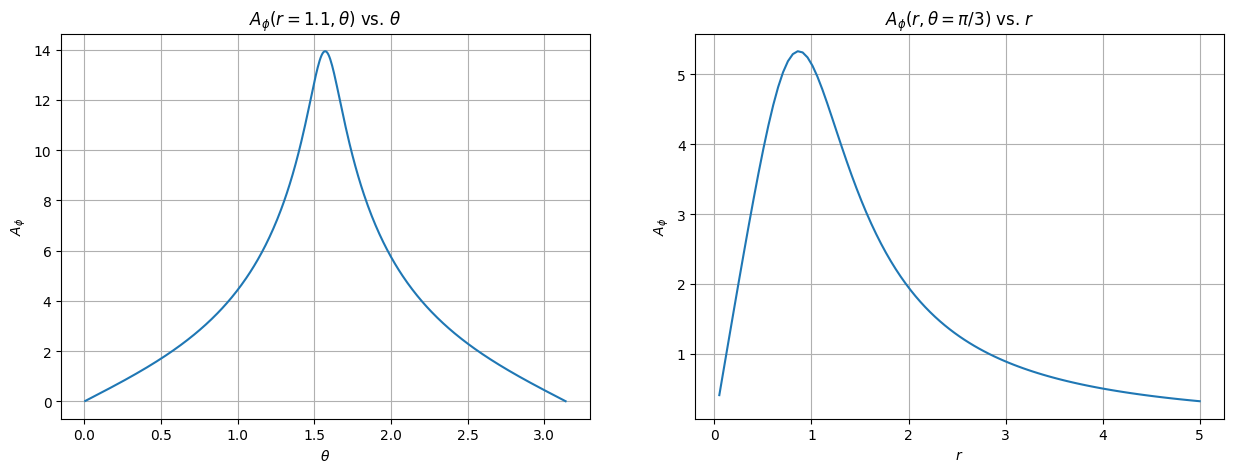

In [56]:

K = lambda k: ellipk(k**2) #Funcion K
E = lambda k: ellipe(k**2) #Funcion E

#Contruir la funcion A_phi
def A_phi(r, theta):
    #Datos del problema 
    a = 1
    I = 3
    mu = 4*np.pi 
    
    #Definimos a k^2
    k2 = 4*a*r*np.sin(theta)/(a**2+r**2+2*a*r*np.sin(theta))
    k = np.sqrt(k2)
    
    #Separamos la funcion en dos terminos
    term1 = ((mu/(4*np.pi ))*4*I*a)/np.sqrt(a**2+r**2+2*a*r*np.sin(theta))
    term2 = (2-k2)*K(k)-2*E(k)
    
    return term2*term1/k**2

#Ahora se procede a graficar a Aφ(r = 1.1, θ) vs. θ y  Aφ(r, θ = π∕3) vs. r

fig, axs = plt.subplots(1,2, figsize=(15,5))
ax = axs.flatten()

#Grafica de Aφ(r = 1.1, θ) vs. θ
r = 1.1
theta = np.linspace(0,2*np.pi,1000)

ax[0].plot(theta, A_phi(r,theta))
ax[0].set_xlabel(r'$\theta$')
ax[0].set_ylabel(r'$A_{\phi}$')
ax[0].set_title(r'$A_{\phi}(r = 1.1, \theta)$ vs. $\theta$')
ax[0].grid()

#Grafica de Aφ(r, θ = π∕3) vs. r
r = np.linspace(0,5,100)
theta = np.pi/3

ax[1].plot(r, A_phi(r,theta))
ax[1].set_xlabel(r'$r$')
ax[1].set_ylabel(r'$A_{\phi}$')
ax[1].set_title(r'$A_{\phi}(r, \theta = \pi/3)$ vs. $r$')
ax[1].grid()

plt.show()


7 Write a double precision program to integrate an arbitrary function numerically using the trapezoid rule, the Simpson rule, and Gaussian quadrature. For our assumed problems there is an analytics answer:

\begin{equation}
\frac{\mathrm{d}N(t)}{\mathrm{d}t}=e^{-t}
\end{equation}

\begin{equation}
N(1)=\int_0^{1}e^{-t} dt=1-e^{-1}
\end{equation}

7.2. Compute the relative error $\epsilon=|numerical-exact|/exact$ in each case. Present your data in the tabular form 
with space or tabas seprating the field. Try N values of 2, 10, 20 , 40 , 80, 160

| N  |$\epsilon_T$ | $\epsilon_S$ | $\epsilon_G$ |
|----|---------------|--------------|--------------|
|   2  |...|...|...|
|   10  |...|...|...|

7.3. Make a log-log plot of relative errore versus. You should observe that 
$\epsilon\approx CN^{\alpha}$, $\mathrm{log} \epsilon =\alpha \mathrm{log}N + \mathrm{constant}$. This mean that a power-law dependence appears as a straight line on a log-log plot, and that if you use $\log_{10}$, the the ordinate on your log-log plot will be the negative of the numver of decimal places of presicion in your calculation.
7.4. Use your plot or table to stimate the power-law dependence of the error $\epsilon$ on the number of points N and to determine the number of decimal places of presicion in your calculation. Do this for both the trapezoid and simpsons rules and for both the algolrithmic and round-off error regimes. (Note that if may be hard to reach the round-off error regime for the trapezoid rule becasue the aproximation ) error is so large

# **Solución**

#1.Parte 1
1. En un cirtcuito con un voltaje de  $\varepsilon(t)$ y una inductancia de L, la primera ley de kirshhoff nos da la siguiente relación 


\begin{equation}
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
\end{equation}

donde r, es la resistencia del ciruito, i es la corriente. Suponga que medimos la corriente con varios valores de t y obtenemos:

t = 1.00, 1.01, 1.02, 1.03, 1.0

i = 3.10, 3.12, 3.14, 3.18, 3.24


donde t se mide en segundos, i se de en amper, la inductancia L es una constante de 0.98 herios, la resistencia es de 0.142 ohms. Aproxime el votaje  $\varepsilon(t)$ en los valores t=1.00, 1.01, 1.02, 1.03, 1.04 ,  para ello realice lo siguiente:


- Construya un data frame de pandas con los valores de tiempo y corriente 
- Emplee un metodo calcular la derivada numérica. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative
from scipy.interpolate import CubicSpline



In [2]:
corriente = {"1": 3.10, "2":3.12, "3": 3.14, "4":3.18, "5": 3.24}
tiempo = {"1":1.00, "2": 1.01, "3": 1.02, "4": 1.03, "5": 1.04}


Amper = pd.Series(corriente)
seg = pd.Series(tiempo)
df= pd.concat([Amper,seg], axis=1)
df.columns= ['Corriente','segundos']
df

,Corriente,segundos
1,3.10,1.00
2,3.12,1.01
3,3.14,1.02
4,3.18,1.03
5,3.24,1.04


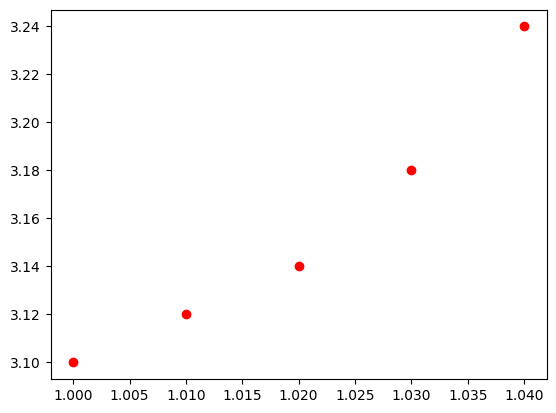

In [3]:
plt.plot(df['segundos'],df['Corriente'], "ro")

In [4]:
url ="https://raw.githubusercontent.com/hernansalinas/autogrades/main/Laboratorios_Taller/dataset/corrienteVstiempo"
df2= pd.read_csv(url)
df2

,Unnamed: 0,Corriente,tiempo
0,0,0.000000,0.00000
1,1,0.014533,0.10101
2,2,0.028854,0.20202
3,3,0.042967,0.30303
4,4,0.056875,0.40404
...,...,...,...
95,95,0.751104,9.59596
96,96,0.754721,9.69697
97,97,0.758285,9.79798
98,98,0.761798,9.89899


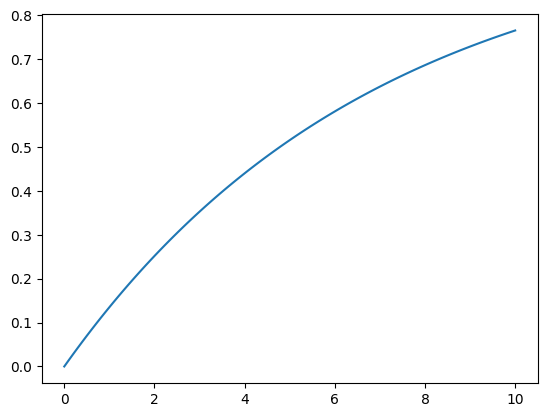

In [5]:
plt.plot(df2['tiempo'],df2['Corriente'])

In [6]:
Cs= CubicSpline(df2['tiempo'],df2['Corriente'])
#plt.plot(df2['tiempo'],Cs(df2['tiempo']))
derivada = derivative(Cs,df2['tiempo'],dx= 0.10101)

<ipython-input-6-8c40ba3d813e>:3: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  derivada = derivative(Cs,df2['tiempo'],dx= 0.10101)


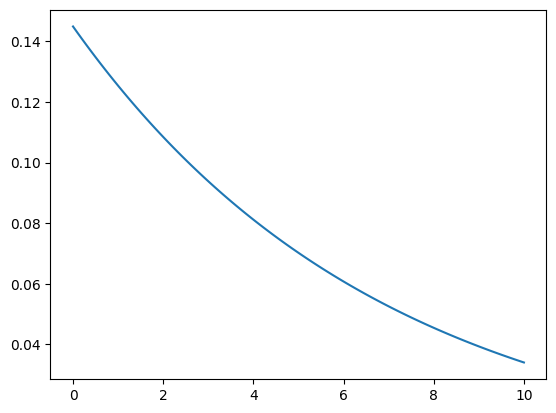

In [7]:
plt.plot(df2['tiempo'],derivada)

In [8]:
derivada

array([0.14493254, 0.14282648, 0.14075085, 0.13870538, 0.13668965,
       0.1347032 , 0.13274563, 0.1308165 , 0.12891541, 0.12704194,
       0.1251957 , 0.12337629, 0.12158333, 0.11981642, 0.11807518,
       0.11635925, 0.11466826, 0.11300184, 0.11135964, 0.10974131,
       0.10814649, 0.10657485, 0.10502605, 0.10349976, 0.10199564,
       0.10051339, 0.09905268, 0.09761319, 0.09619463, 0.09479668,
       0.09341904, 0.09206143, 0.09072355, 0.08940511, 0.08810583,
       0.08682543, 0.08556363, 0.08432018, 0.0830948 , 0.08188722,
       0.08069719, 0.07952446, 0.07836877, 0.07722987, 0.07610753,
       0.0750015 , 0.07391154, 0.07283742, 0.0717789 , 0.07073578,
       0.06970781, 0.06869478, 0.06769647, 0.06671267, 0.06574317,
       0.06478775, 0.06384623, 0.06291838, 0.06200402, 0.06110294,
       0.06021496, 0.05933989, 0.05847753, 0.05762771, 0.05679023,
       0.05596492, 0.05515161, 0.05435012, 0.05356028, 0.05278191,
       0.05201486, 0.05125895, 0.05051403, 0.04977994, 0.04905

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative
from scipy.interpolate import CubicSpline

def read_file(phat,select):
  if(select=="csv"):
    df= pd.read_csv(phat)
  elif(select=="xlsx"):
    df=pd.read_excel(phat)
  else:
    print("El argumento de read file deberia ser phat y select= cvs o xls")
    df= None
  return  df 

def derivada(df):

  Cs= CubicSpline(df['tiempo'],df['Corriente'])
  derivada = derivative(Cs,df['tiempo'],dx= 0.10101) 
  return derivada   


In [10]:
read_file(url,"csv")
dA_dt= derivada(read_file(url,"csv"))

<ipython-input-9-593184af8e3e>:20: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  derivada = derivative(Cs,df['tiempo'],dx= 0.10101)


# Parte 2

1. Escribir en código Markdown la expresión para calcular una integral con la regla del trapecio.

2. Escribir en código Markdown la expresión para calcular una integral con la regla del simpson


3. Escribir en código Markdown la expresión para calcular una integral con el metodo de cuadratura.

4. Calcular una aproximación con el metodo 1,2,3 de las siguientes integrales

<!-- 
 $$
 \int_0^\pi e^{1-\sqrt{x}}\, dx
 $$  -->


- $$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\, dx
 $$

- 
$$
 \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
 $$


- 

$$
 \int_{0}^{\pi/4} \int_{\sin x}^{\cos x} (2y\sin x +\cos^2 x)\, dxdy
 $$

<!-- 
- 
$$
 \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
 $$ -->

<!-- 
- 
$$
 \int_{e}^{2e} \frac{1}{\ln x} \, dx
 $$ -->


garantizando  que el error sea menor a $\varepsilon=1E-5$.  

1. Escribir en código Markdown la expresión para calcular una integral con la regla del trapecio.

Dada la función $ f(x)$ y los intevalos $ I= [a, b]$ la integral por la regla del trapecio es :  

\begin{equation}
\int_a^b f(x) \mathrm{d}x \approx \frac{\Delta x}{2}[f(x_{0})+2f(x_{1})+2f(x_{2})+...+2f(x_{n-1})+ f(x_{n})]
\end{equation}

Donde $\Delta x$= $\frac{b-a}{n}$ y $n$ representa el numero de sub intervalos en los que se divide $I$.  
  
2. Escribir en código Markdown la expresión para calcular una integral con la regla del simpson  


Dada la función $ f(x)$ y los intevalos $I= [a, b]$ la integral por la regla de Simpson dice :  


\begin{equation}
\int_a^b f(x) \mathrm{d}x \approx \frac{\Delta x}{3}[f(x_{0}) + 2\sum_{j=1}^{n-1}f(x_{2j})+ 4\sum_{j=1}^{n}f(x_{2j-1})+f(x_{n})]
\end{equation}

Donde $\Delta x$= $\frac{b-a}{n}$ con $n$ par.  

3. Escribir en código Markdown la expresión para calcular una integral con el metodo de cuadratura.

La integración por la el método de cuadratura o método de cuadratura de Gauss esta dada por la expresión:  
  
\begin{equation}
\int_a^b f(x) \mathrm{d}x \approx \sum_{i=1}^{n}W_{i}f(x_{i})
\end{equation}

Donde $W_{i}$ son coeficiente arbitrarios y depende de los puntos que se tomen dentro del intervalo y $x_{i} \in [a,b]$














In [11]:
from scipy import integrate
import numpy as np
import matplotlib.pylab as plt

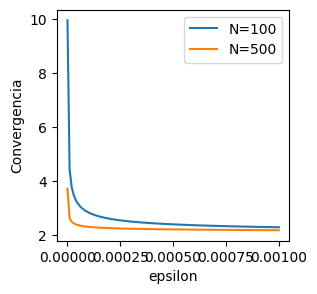

In [12]:

f = lambda x : 1/(np.tan(x)**0.5)


@np.vectorize
def integral_trap(N, epsilon):
  x = np.linspace(0+epsilon, np.pi/2-epsilon, N)  
  area = integrate.trapz(f(x), x)
  return area

ep=np.linspace(1E-6, 1E-3, 100)
t1=integral_trap(100, ep)
t2=integral_trap(500, ep)
plt.figure(figsize=(3, 3))
plt.plot(ep, t1, label="N=100")
plt.plot(ep, t2, label="N=500")
plt.xlabel("epsilon")
plt.ylabel("Convergencia")
plt.legend()


$$
 \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
 $$

In [13]:
f = lambda x: 1/(1+x**2)
N= 10000
x_ = np.linspace(-(100),100,N)
Integral_simp= integrate.simpson(f(x_),x_,dx= 0.0000001,even='avg')

Integral_simp


3.1215933202165025

$$
 \int_{0}^{\pi/4} \int_{\sin x}^{\cos x} (2y\sin x +\cos^2 x)\, dxdy
 $$

In [14]:
# Primero integraré de forma simbolica con sympy la primer parte de la integral, luego integraré respecto a y con alguno de los métodos
import sympy as sp
x= sp.symbols("x")
y = sp.symbols("y")
T1 = sp.sin(x)
T2= sp.cos(x)**2

f= 2*y*T1+T2 # acá lo que hice fue crear la funcion inicial
int1 = sp.integrate(f,(x,sp.sin(y),sp.cos(y))) # Integré simbolicamente entre las funciones evaluadas en y
num_int1= sp.lambdify(y,int1,'numpy') # Pasé la función resultante a un objeto de numpy

x_1= np.linspace(0,np.pi/4,100) #cree un linspace entre los limites
Integral_t= integrate.simpson(num_int1(x_1),x_1,dx=0.001, even='avg') # integre numericamente con el método simpson
Integral_t

0.40411966830294965

In [15]:
import sympy as sp
from scipy import optimize
import matplotlib.pyplot as plt
from scipy.integrate import trapz
from scipy.integrate import simpson
from scipy.integrate import quadrature

f = lambda x : sp.log(1+x**2)
#f = lambda x : 1/(1+x**2)
x = sp.symbols("x")

d1= sp.diff(f(x), x,1)
d2= sp.diff(f(x),x,2)



In [16]:
d1

2*x/(x**2 + 1)

In [17]:
d2

2*(-2*x**2/(x**2 + 1) + 1)/(x**2 + 1)

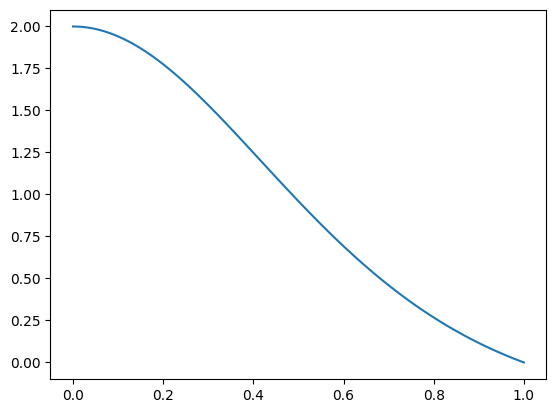

In [18]:
d2_np= sp.lambdify(x, d2, 'numpy')
nd2_np= (-1)*d2_np(x)
x_= np.linspace(0.0001,1,100)

plt.plot(x_,d2_np(x_))

In [19]:
min= optimize.fmin_powell(d2_np,0.0001)
Max= np.max(d2_np(x_))

epsilon = 0.001
n= np.sqrt(abs(-d2_np(Max)/epsilon*12))


Optimization terminated successfully.
         Current function value: -0.250000
         Iterations: 2
         Function evaluations: 39


In [20]:
n

53.66563188931997

In [21]:
f_np= sp.lambdify(x, f(x), 'numpy')
a=0
b=1
N= 53
x_ = np.linspace(a,b,N)
integ= trapz(f_np(x_),x_)
integ

0.2639743260852223

7 Write a double precision program to integrate an arbitrary function numerically using the trapezoid rule, the Simpson rule, and Gaussian quadrature. For our assumed problems there is an analytics answer:

\begin{equation}
\frac{\mathrm{d}N(t)}{\mathrm{d}t}=e^{-t}
\end{equation}

\begin{equation}
N(1)=\int_0^{1}e^{-t} dt=1-e^{-1}
\end{equation}

7.2. Compute the relative error $\epsilon=|numerical-exact|/exact$ in each case. Present your data in the tabular form 
with space or tabas seprating the field. Try N values of 2, 10, 20 , 40 , 80, 160

| N  |$\epsilon_T$ | $\epsilon_S$ | $\epsilon_G$ |
|----|---------------|--------------|--------------|
|   2  |...|...|...|
|   10  |...|...|...|

7.3. Make a log-log plot of relative errore versus. You should observe that 
$\epsilon\approx CN^{\alpha}$, $\mathrm{log} \epsilon =\alpha \mathrm{log}N + \mathrm{constant}$. This mean that a power-law dependence appears as a straight line on a log-log plot, and that if you use $\log_{10}$, the the ordinate on your log-log plot will be the negative of the numver of decimal places of presicion in your calculation.
7.4. Use your plot or table to stimate the power-law dependence of the error $\epsilon$ on the number of points N and to determine the number of decimal places of presicion in your calculation. Do this for both the trapezoid and simpsons rules and for both the algolrithmic and round-off error regimes. (Note that if may be hard to reach the round-off error regime for the trapezoid rule becasue the aproximation ) error is so large

In [22]:
# Calculo simbolico para tener la integral exacta

x= sp.symbols("x")
f2 = x**2
symbo_int= sp.integrate(f2,(x,0,1))
symbo_int
int_np= sp.lambdify(x, symbo_int, 'numpy')
float(symbo_int)

0.3333333333333333

In [23]:
# Integral numerica
f_2= lambda x : x**2
a= 0
b= 1
N= 2
x_2= np.linspace(a,b,N)
inte_traP = trapz(f_2(x_2),x_2)
inte_traP

0.5

In [24]:
#Error
error= (inte_traP-1/3)/inte_traP
error


0.33333333333333337

In [25]:
def errorT(funtion,a,b,N):
  x= sp.symbols("x")
  f= funtion
  symbo_int = sp.integrate(f,(x,a,b))
  exac = float(symbo_int)
  f_num= lambda x: eval(funtion)

  x_3 = np.linspace(a,b,N)
  #print(type(f_num(x_3)))
  int_num= trapz(f_num(x_3),x_3) # Este error no lo entiendo

  return int_num
funtion = "x**2"
errorT(funtion,0,1,2)




0.5

5. The next  problems are examples of how elliptic integrals enter into realistic physics problems. It is straightforward to evaluate any integral numerically using the techniques of this chapter, but it may be difficult for you to  know if the answers you obtain are correct. One way to hone your integralevaluating skills is to compare your answers from quadrature to power series
expressions, or to a polynomial approximations of know precision. To help you in this regard, we present here a polynomial approximation for an elliptic integral (Abramowitz and Stegun, 1972):

\begin{equation}
K(m)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-m\sin^2\phi}}
\end{equation}

\begin{equation}
\approx a_0+a_1m_1+a_2m_2 - [ b_0+b_1m_1+b_2m_1^2]\ln m_1 + \epsilon(m) 
\end{equation}



$m_1 = 1-m$, 

$ 0 \le m \le1 $

$\epsilon(m)\leq 3\times 10^{-5}$



$a_0 = 1.3862944$

$b_0 = 0.5$

$a_1 = 0.1119723$

$b_1 = 0.1213478$

$a_2 = 0.00725296$

$b_2 = 0.0288729$

In [26]:
m= 0.5
K = lambda phi: 1/np.sqrt(1-m*np.sin(phi)**2) 
ϕ = sp.symbols("ϕ")
funtion= 1/sp.sqrt(1-m*sp.sin(ϕ)**2)
K_sp= sp.integrate(funtion,(ϕ,0,sp.pi/2))
result= float(K_sp)




In [27]:
result

1.8540746773013719

In [28]:
m= 0.5
m1=1-m
eps=3E-5
a0= 1.3862944
b0= 0.5
a1= 0.1119723
b1= 0.1213478
a2= 0.00725296
b2= 0.0288729


In [29]:
num_inte= a0+a1*m1+a2*m1-(b0+b1*m1+b2*m1**2)*np.log10(m1)+eps
num_inte

1.6168895939263592